In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
creditData=pd.read_csv('csv_result-dataset_31_credit-g.csv')

In [122]:
creditData.head()

,id,'checking_status','duration','credit_history','purpose','credit_amount','savings_status','employment','installment_commitment','personal_status',...,'property_magnitude','age','other_payment_plans','housing','existing_credits','job','num_dependents','own_telephone','foreign_worker','class'
0,1,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,3,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,4,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,5,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [123]:
def columnClean(column):
    column=column.replace("'","")
    column=column.capitalize()
    return column
def employment(val):
    if val=='1<=X<4':
        return '1-4'
    elif val=='4<=X<7':
        return '4-7'
    elif val=='>=7':
        return 'above 7'
    elif val=='<1':
        return 'below 1'
    else:
        return '0'
def checkingStatus(val):
    if val=='no checking' and val=='<0':
        return '0'
    elif val=='0<=X<200':
        return '0-200'
    else:
        return 'above 200'
def savingStatus(val):
    if val=='no known savings':
        return '0'
    elif val=='<100':
        return 'below 100'
    elif val=='100<=X<500':
        return '100-500'
    elif val=='500<=X<1000':
        return '500-1000'
    else:
        return 'above 1000'

In [124]:
newColumn=np.vectorize(columnClean)(creditData.columns)
creditData.columns=newColumn

In [125]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   Checking_status         1000 non-null   object
 2   Duration                1000 non-null   int64 
 3   Credit_history          1000 non-null   object
 4   Purpose                 1000 non-null   object
 5   Credit_amount           1000 non-null   int64 
 6   Savings_status          1000 non-null   object
 7   Employment              1000 non-null   object
 8   Installment_commitment  1000 non-null   int64 
 9   Personal_status         1000 non-null   object
 10  Other_parties           1000 non-null   object
 11  Residence_since         1000 non-null   int64 
 12  Property_magnitude      1000 non-null   object
 13  Age                     1000 non-null   int64 
 14  Other_payment_plans     1000 non-null   object
 15  Housi

In [135]:
#creditData['Savings_status'].value_counts()
creditData.head()

,Id,Checking_status,Duration,Credit_history,Purpose,Credit_amount,Savings_status,Employment,Installment_commitment,Personal_status,...,Property_magnitude,Age,Other_payment_plans,Housing,Existing_credits,Job,Num_dependents,Own_telephone,Foreign_worker,Class
0,1,above 200,6,critical/other existing credit,radio/tv,1169,0,above 7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0-200,48,existing paid,radio/tv,5951,below 100,1-4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,no,yes,bad
2,3,above 200,12,critical/other existing credit,education,2096,below 100,4-7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,no,yes,good
3,4,above 200,42,existing paid,furniture/equipment,7882,below 100,4-7,2,male single,...,life insurance,45,none,for free,1,skilled,2,no,yes,good
4,5,above 200,24,delayed previously,new car,4870,below 100,1-4,3,male single,...,no known property,53,none,for free,2,skilled,2,no,yes,bad


In [127]:
creditData['Savings_status']=np.vectorize(savingStatus)(creditData['Savings_status'])

In [129]:
#creditData['Own_telephone'].value_counts()
creditData['Own_telephone']=creditData['Own_telephone'].replace(to_replace='none',value='no')

In [133]:
creditData['Employment']=np.vectorize(employment)(creditData['Employment'])

In [132]:
creditData['Checking_status']=np.vectorize(checkingStatus)(creditData['Checking_status'])

In [137]:
creditData['Property_magnitude']=creditData['Property_magnitude'].replace(to_replace='no known property',value='none')

In [140]:
creditData.to_csv('credit-cleaned-data.csv',index=False)

In [141]:
cleanData=pd.read_csv('credit-cleaned-data.csv')

In [142]:
cleanData.head()

,Id,Checking_status,Duration,Credit_history,Purpose,Credit_amount,Savings_status,Employment,Installment_commitment,Personal_status,...,Property_magnitude,Age,Other_payment_plans,Housing,Existing_credits,Job,Num_dependents,Own_telephone,Foreign_worker,Class
0,1,above 200,6,critical/other existing credit,radio/tv,1169,0,above 7,4,male single,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,2,0-200,48,existing paid,radio/tv,5951,below 100,1-4,2,female div/dep/mar,...,real estate,22,none,own,1,skilled,1,no,yes,bad
2,3,above 200,12,critical/other existing credit,education,2096,below 100,4-7,2,male single,...,real estate,49,none,own,1,unskilled resident,2,no,yes,good
3,4,above 200,42,existing paid,furniture/equipment,7882,below 100,4-7,2,male single,...,life insurance,45,none,for free,1,skilled,2,no,yes,good
4,5,above 200,24,delayed previously,new car,4870,below 100,1-4,3,male single,...,none,53,none,for free,2,skilled,2,no,yes,bad


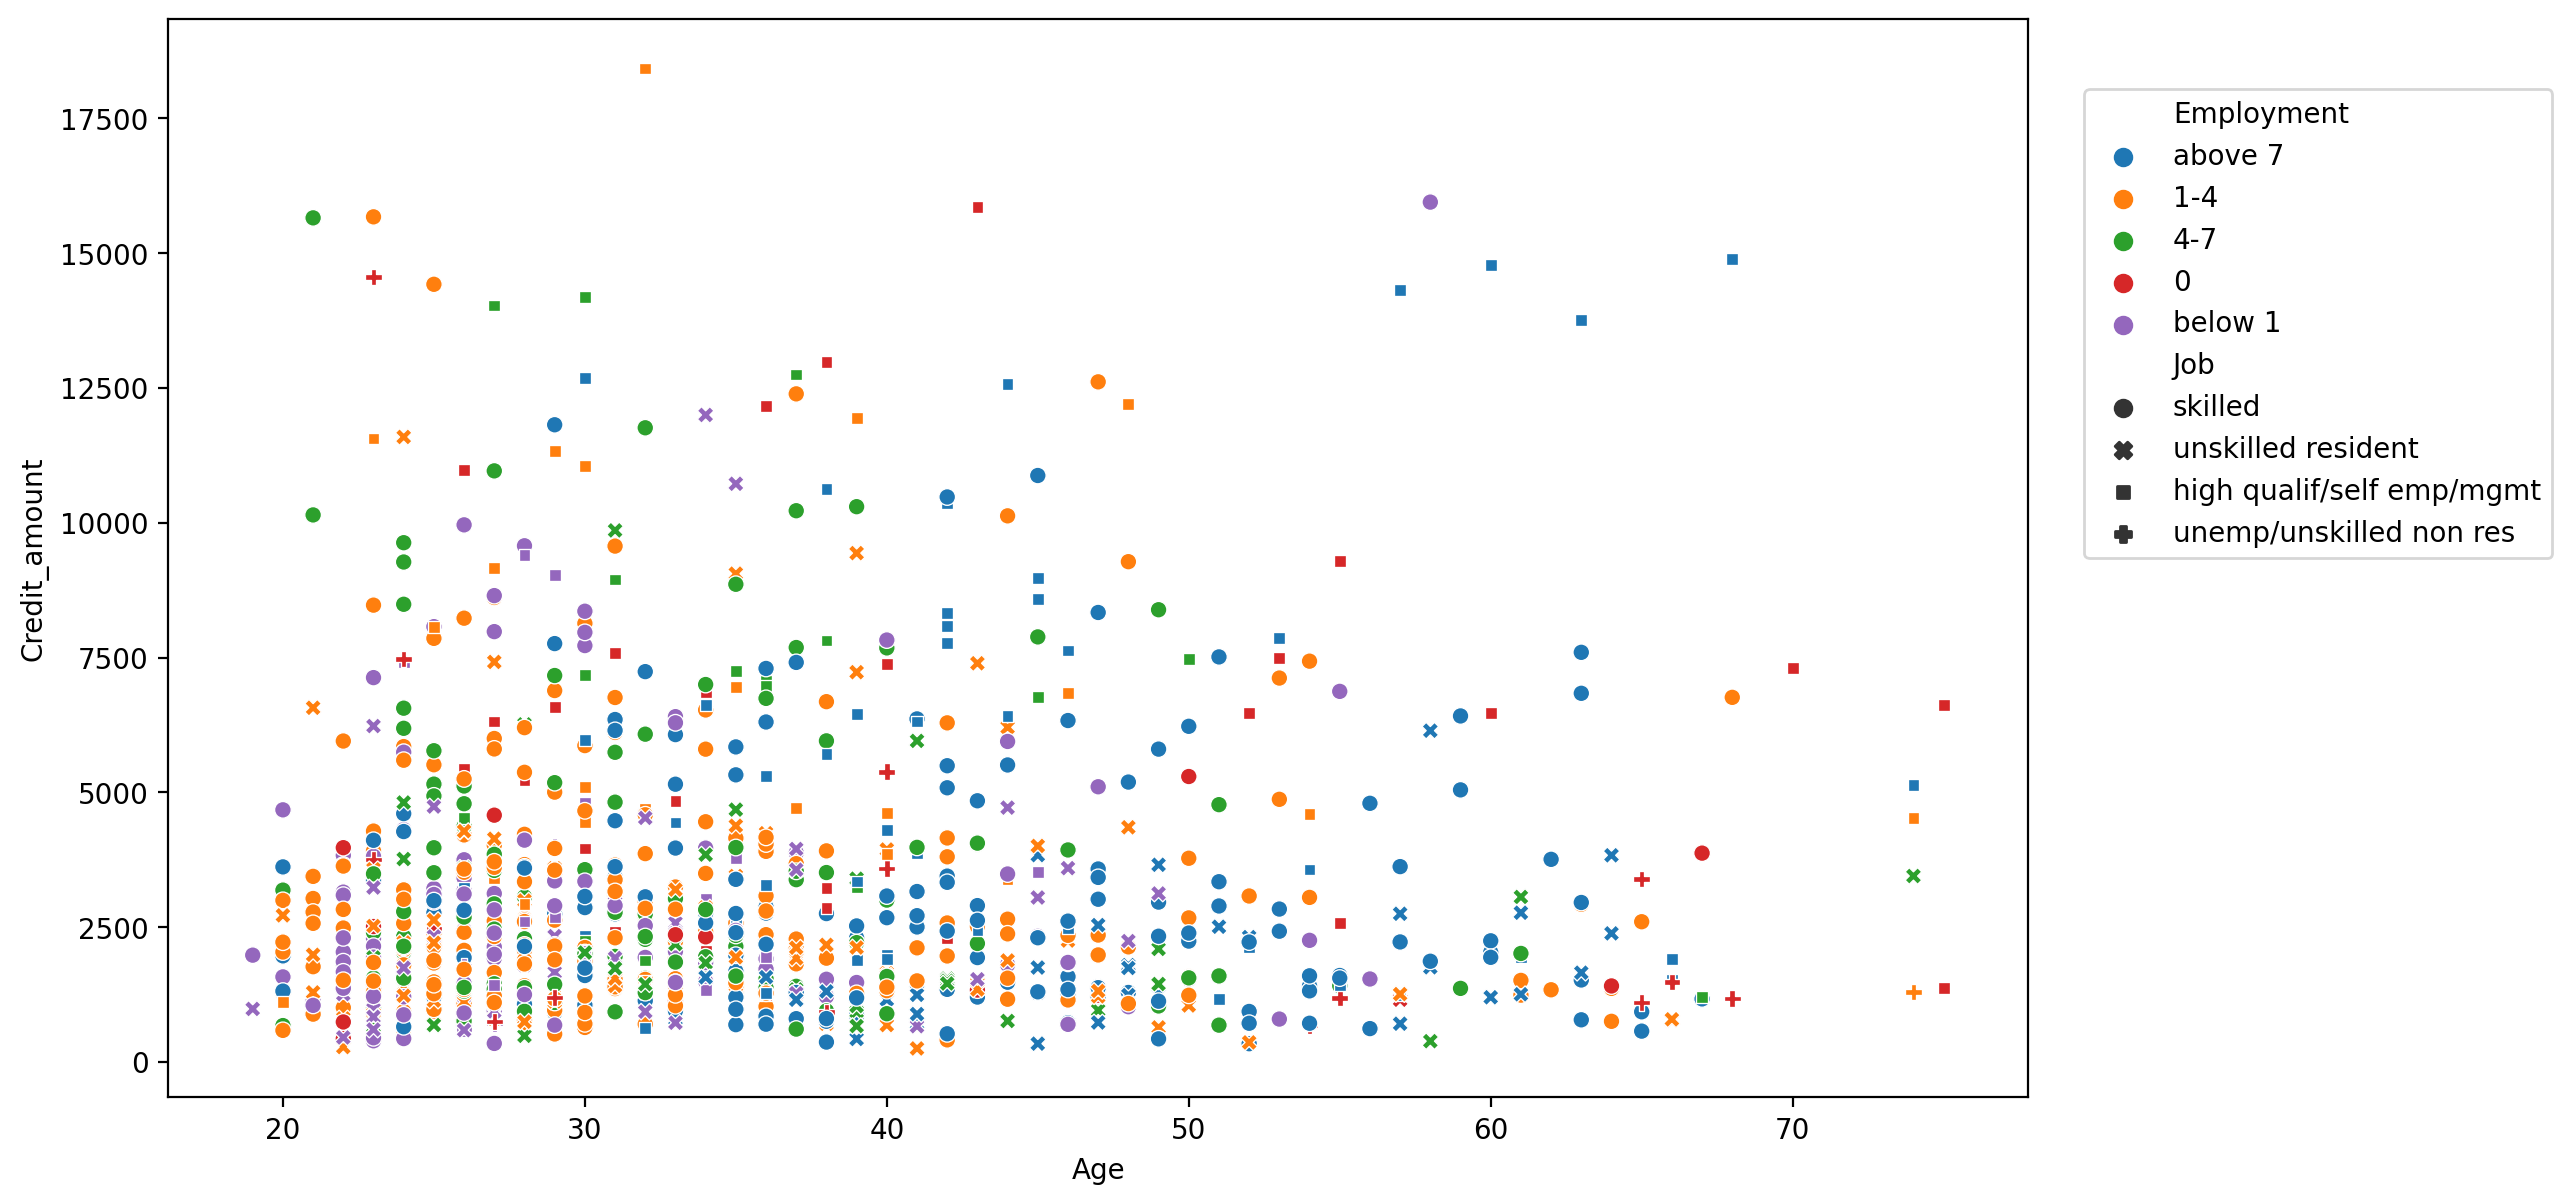

In [167]:
plt.figure(figsize=(12,7),dpi=200)
sns.scatterplot(data=cleanData,x='Age',y='Credit_amount',hue='Employment',style='Job')
plt.legend(loc=(1.03,0.5))
plt.savefig('creditAnalysis.png')